<p style="text-align: center; font-size: 40px">به نام خدا</p>
<p style="text-align: center; font-size: 30px">فاز دوم تمرین کامپیوتری شماره 5</p>
<p style="text-align: center; font-size: 30px">علی مهرانی - 810198542</p>

In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

# Section 0
Data loading

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


## showing dataset classes image

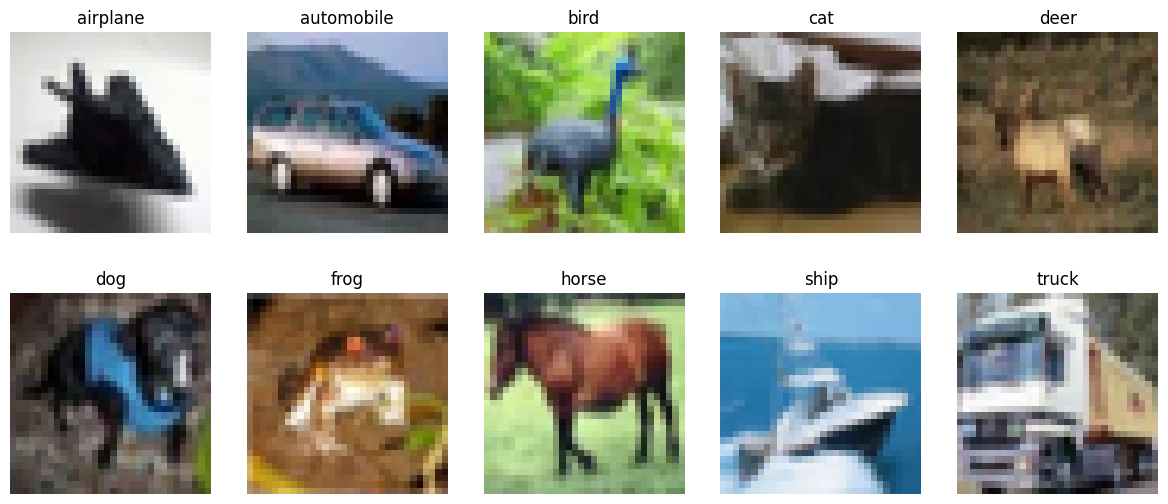

In [3]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot one image from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, ax in enumerate(axes.flat):
    # Find the first image of the current class in the training set
    index = np.where(y_train == i)[0][0]
    # Display the image
    ax.imshow(x_train[index])
    ax.set_title(class_names[i])
    ax.axis('off')
    
plt.show()

## Showing test/train data distibution

### train

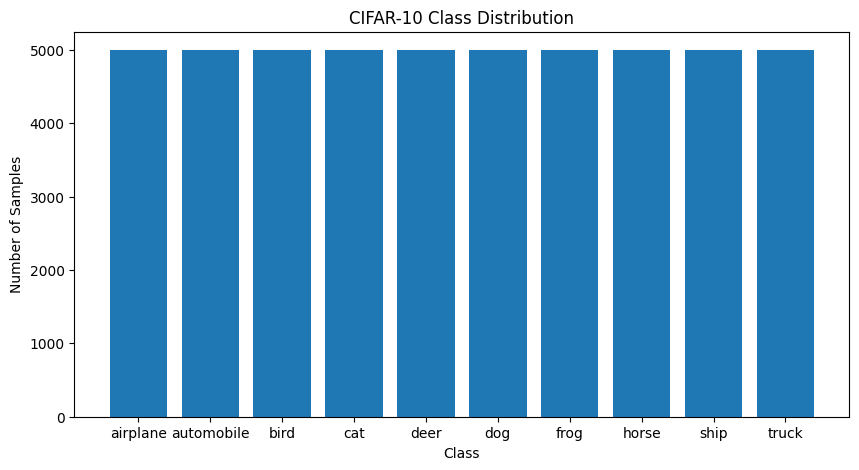

In [4]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)

# Plot the label counts
plt.figure(figsize=(10,5))
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels, class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('CIFAR-10 Class Distribution')
plt.show()

### test

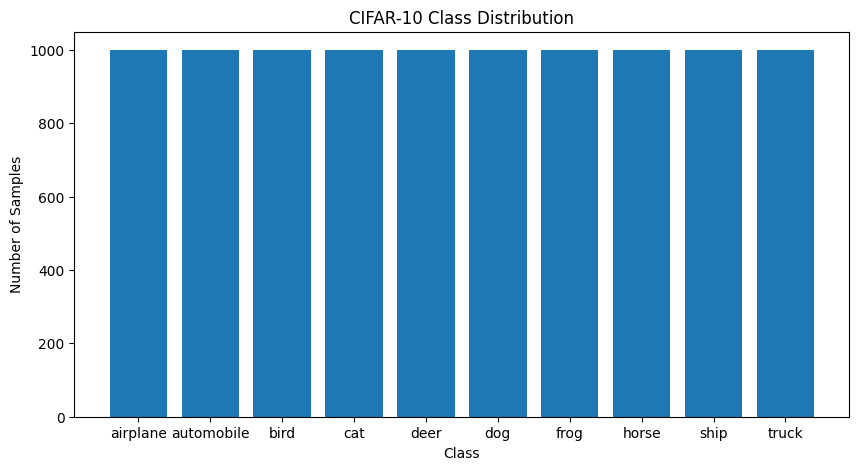

In [5]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)

# Plot the label counts
plt.figure(figsize=(10,5))
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels, class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('CIFAR-10 Class Distribution')
plt.show()

## Normalization

Since we're giving our images to the CNN, their shape must be matched to what our model expects, so we reshape our iamges to (32 X 32 X 3) RGB images and normalize it's pixel values to be in the range of (0,1). 

In [6]:
x_train=x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train=x_train / 255.0
x_test=x_test / 255.0

## Label Encoding

We use One Hot encoding here to apply label encoding for 'categorial values'.

In [7]:
classes_num = 10
y_train = tf.keras.utils.to_categorical(y_train, classes_num)
y_test  = tf.keras.utils.to_categorical(y_test , classes_num)

Let's test it.

In [8]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Let's see some images again.

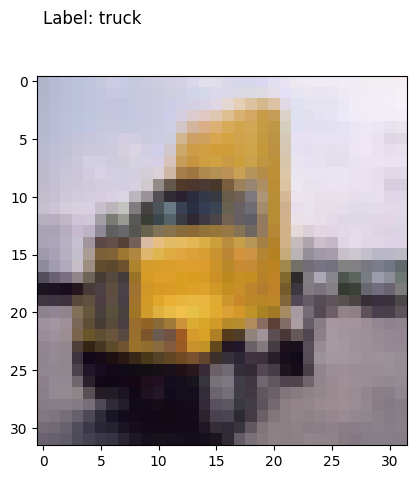

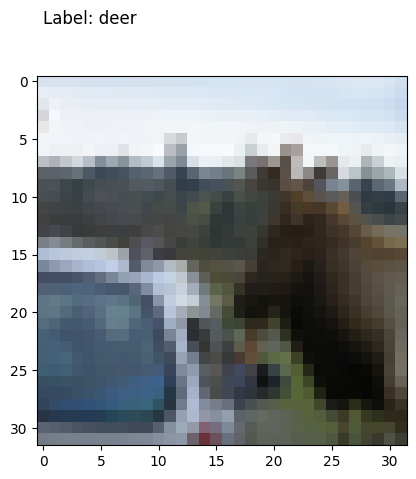

In [9]:
import random
rand_train = random.randint(0, 49999)
rand_test  = random.randint(0, 9999)

plt.imshow(x_train[rand_train])
plt.text(0, -5, f"Label: {class_names[np.argmax(y_train[rand_train])]}", fontsize=12, color="black")
plt.show()

plt.imshow(x_test[rand_test])
plt.text(0, -5, f"Label: {class_names[np.argmax(y_test[rand_test])]}", fontsize=12, color="black")
plt.show()

# Section 1
## Creating CNN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Input, Flatten
from tensorflow.keras.optimizers import Adam

In [11]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

cnn.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
log = cnn.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 22s 6ms/step - loss: 1.3583 - accuracy: 0.5084 - val_loss: 1.0825 - val_accuracy: 0.6167
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8843 - accuracy: 0.6911 - val_loss: 0.8956 - val_accuracy: 0.6895
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6770 - accuracy: 0.7627 - val_loss: 0.7802 - val_accuracy: 0.7351
Epoch 4/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5241 - accuracy: 0.8174 - val_loss: 0.7661 - val_accuracy: 0.7434
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3882 - accuracy: 0.8629 - val_loss: 0.8096 - val_accuracy: 0.7537
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2757 - accuracy: 0.9014 - val_loss: 0.9091 - val_accuracy: 0.7511
Epoch 7/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1969 - accuracy: 0.9307 - val_loss: 1.1019 - val_accuracy

## Test data prediction

In [12]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test) # it's actually done above by setting validation attribute when fitting

313/313 [==============================] - 1s 4ms/step - loss: 2.0255 - accuracy: 0.7368


## Evaluation

Text(0.5, 0, 'Epoch')

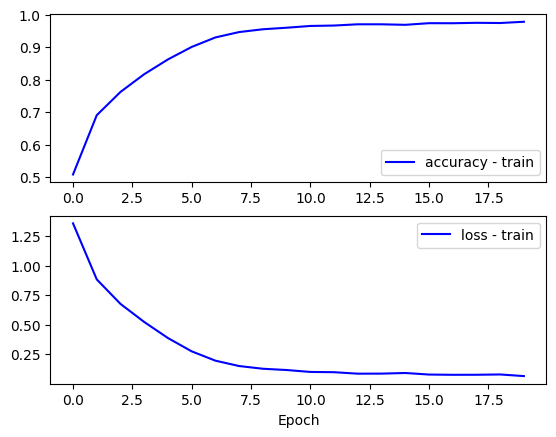

In [13]:
figure, ax = plt.subplots(2,1)

ax[0].plot(log.history['accuracy'], color='b', label="accuracy - train")
legend = ax[0].legend()
# ax[0].set_xlabel('Epoch')

ax[1].plot(log.history['loss'], color='b', label="loss - train")
legend = ax[1].legend()
ax[1].set_xlabel('Epoch')


In [14]:
from sklearn.metrics import classification_report

train_prob = cnn.predict(x_train)
test_prob = cnn.predict(x_test)

train_pred = np.argmax(train_prob, axis=1)
test_pred = np.argmax(test_prob, axis=1)

train_report = classification_report(np.argmax(y_train, axis=1), train_pred)
test_report = classification_report(np.argmax(y_test, axis=1), test_pred)

print("Training data evaluation results : ")
print(train_report)

print("Test data evaluation results : ")
print(test_report)

313/313 [==============================] - 1s 2ms/step
Training data evaluation results : 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5000
           1       1.00      0.98      0.99      5000
           2       0.97      0.97      0.97      5000
           3       0.98      0.95      0.96      5000
           4       0.97      0.98      0.98      5000
           5       0.95      0.99      0.97      5000
           6       0.95      0.99      0.97      5000
           7       0.97      0.99      0.98      5000
           8       0.99      0.98      0.98      5000
           9       0.99      0.99      0.99      5000

    accuracy                           0.98     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.98      0.98      0.98     50000

Test data evaluation results : 
              precision    recall  f1-score   support

           0       0.85      0.68      0.76      1000
         

## Adam vs SGD

SGD is a popular optimization algorithm that updates the model parameters in the direction of the negative gradient of the loss function.    
It computes the gradients of the loss function for each training example, and updates the parameters based on a learning rate and the average of these gradients.     
Adam is an optimization algorithm that computes adaptive learning rates for each parameter.    
It can can help overcome some of the limitations of SGD.      
SGD is a basic optimization algorithm that updates parameters using a constant learning rate and the gradient of the loss function, Adam is an advanced optimizer that adapts the learning rate based on the first and second moments of the gradients of the loss function.      
Adam is actually more efficient than the SGD, especially when dealing with large datasets.     

# Section 2

## Deleting 80% of training data for 'plane' and 'car'

5000
5000


Exception ignored in: <function _xla_gc_callback at 0x7f77b464bac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


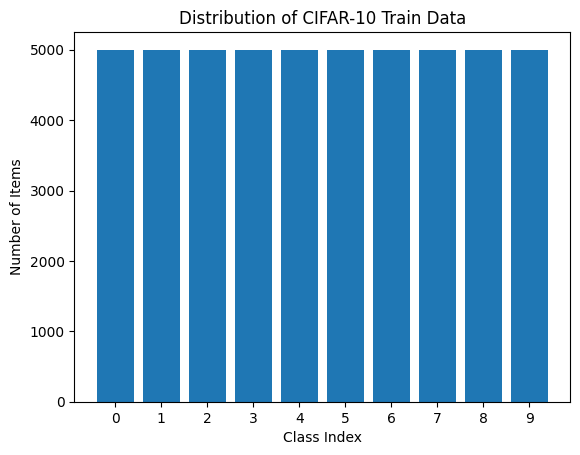

In [15]:
car_indices = np.where(y_train[:, 1] == 1)[0]
airplane_indices = np.where(y_train[:, 0] == 1)[0]

print(len(car_indices))
print(len(airplane_indices))

# Count number of items in each class
# class_counts = [0] * 10
# for i in range(len(y_train)):
#     class_index = tf.argmax(y_train[i]).numpy()
#     class_counts[class_index] += 1

# # Plot the distribution
# plt.bar(range(10), class_counts)
# plt.xticks(range(10))
# plt.title('Distribution of CIFAR-10 Train Data')
# plt.xlabel('Class Index')
# plt.ylabel('Number of Items')
# plt.show()


In [16]:
# Define the fraction of samples to keep
frac = 0.2

# Filter out the indices of the first and second classes
idx_to_keep = []
for i in range(classes_num):
    idx_class_i = np.where(y_train[:,i]==1)[0]
    if i in [0,1]:
        # Randomly sample 20% of the indices to keep
        n_to_keep = int(frac*len(idx_class_i))
        idx_to_keep.extend(np.random.choice(idx_class_i, size=n_to_keep, replace=False))
    else:
        # Keep all the indices for other classes
        idx_to_keep.extend(idx_class_i)

# Sort the indices to keep and select the corresponding data
idx_to_keep = np.sort(idx_to_keep)
x_train_new = x_train[idx_to_keep]
y_train_new = y_train[idx_to_keep]


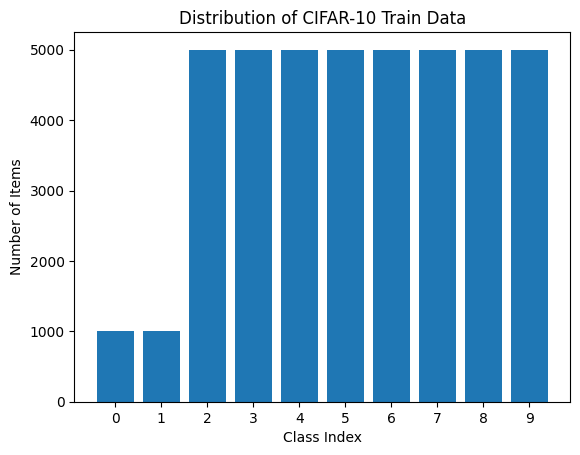

In [17]:
class_counts = [0] * 10
for i in range(len(y_train_new)):
    class_index = tf.argmax(y_train_new[i]).numpy()
    class_counts[class_index] += 1

plt.bar(range(10), class_counts)
plt.xticks(range(10))
plt.title('Distribution of CIFAR-10 Train Data')
plt.xlabel('Class Index')
plt.ylabel('Number of Items')
plt.show()

## Fitting the new data

In [18]:
cnn_del = Sequential()
cnn_del.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train_new.shape[1:]))
cnn_del.add(Activation('relu'))
cnn_del.add(Conv2D(32, (3, 3)))
cnn_del.add(Activation('relu'))
cnn_del.add(MaxPooling2D(pool_size=(2, 2)))

cnn_del.add(Conv2D(64, (3, 3), padding='same'))
cnn_del.add(Activation('relu'))
cnn_del.add(Conv2D(64, (3, 3)))
cnn_del.add(Activation('relu'))
cnn_del.add(MaxPooling2D(pool_size=(2, 2)))

cnn_del.add(Flatten())
cnn_del.add(Dense(512))
cnn_del.add(Activation('relu'))
cnn_del.add(Dense(10))
cnn_del.add(Activation('softmax'))

cnn_del.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
log_del = cnn_del.fit(x_train_new, y_train_new, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1313/1313 [==============================] - 11s 7ms/step - loss: 1.3939 - accuracy: 0.4988 - val_loss: 1.2166 - val_accuracy: 0.5739
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.9386 - accuracy: 0.6678 - val_loss: 1.0257 - val_accuracy: 0.6444
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.7308 - accuracy: 0.7411 - val_loss: 0.9491 - val_accuracy: 0.6788
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5720 - accuracy: 0.8012 - val_loss: 0.9621 - val_accuracy: 0.7014
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4258 - accuracy: 0.8493 - val_loss: 0.9196 - val_accuracy: 0.7198
Epoch 6/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2966 - accuracy: 0.8962 - val_loss: 1.0537 - val_accuracy: 0.7114
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2030 - accuracy: 0.9289 - val_loss: 1.2916 - val_accuracy

In [19]:
test_loss_del, test_accuracy_del = cnn_del.evaluate(x_test, y_test) 

313/313 [==============================] - 1s 3ms/step - loss: 2.9570 - accuracy: 0.6779


Text(0.5, 0, 'Epoch')

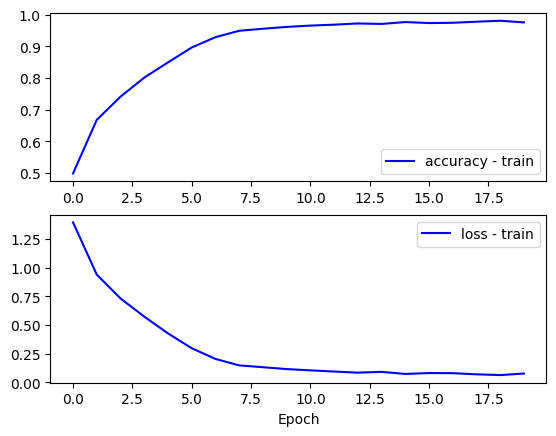

In [20]:
figure, ax = plt.subplots(2,1)

ax[0].plot(log_del.history['accuracy'], color='b', label="accuracy - train")
legend = ax[0].legend()

ax[1].plot(log_del.history['loss'], color='b', label="loss - train")
legend = ax[1].legend()
ax[1].set_xlabel('Epoch')

In [21]:
train_prob_del = cnn_del.predict(x_train_new)
test_prob_del  = cnn_del.predict(x_test)

train_pred_del = np.argmax(train_prob_del, axis=1)
test_pred_del  = np.argmax(test_prob_del, axis=1)

train_report_del = classification_report(np.argmax(y_train_new, axis=1), train_pred_del)
test_report_del  = classification_report(np.argmax(y_test, axis=1), test_pred_del)

print("Training data evaluation results : ")
print(train_report_del)

print("Test data evaluation results : ")
print(test_report_del)

313/313 [==============================] - 1s 2ms/step
Training data evaluation results : 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1000
           1       1.00      0.92      0.96      1000
           2       0.98      0.99      0.98      5000
           3       0.98      0.98      0.98      5000
           4       0.99      0.98      0.98      5000
           5       0.97      0.99      0.98      5000
           6       0.99      0.99      0.99      5000
           7       1.00      0.98      0.99      5000
           8       1.00      0.99      0.99      5000
           9       0.98      1.00      0.99      5000

    accuracy                           0.99     42000
   macro avg       0.99      0.98      0.98     42000
weighted avg       0.99      0.99      0.99     42000

Test data evaluation results : 
              precision    recall  f1-score   support

           0       0.88      0.40      0.55      1000
         

It can be seen that the recall and f-1 score of the first and second classes (0, 1) has been decreased by a large value !    
If the number of samples in a class in the training data decreases significantly, it means that the model has less information to learn from for that specific class. This can result in the model being less capable of recognizing instances of that class during testing, leading to a decrease in recall score.

Additionally, if the number of tests becomes more than the number of training data, this can lead to overfitting and poor generalization performance, since the model may not have seen enough examples during training to accurately capture the underlying patterns in the data.

Overall, having a small number of samples in a class can make it difficult for the model to generalize well to new, unseen examples, which can negatively impact the recall score.

# Section 3

In this section we apply RandomRotation technique for data augmentation to balance our data. 

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation with random zoom
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5,1.0])
datagen = ImageDataGenerator(rotation_range=20)
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

cnn.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
log = cnn.fit(datagen.flow(x_train_new, y_train_new, batch_size=32),
          epochs=20,
          validation_data=(x_test, y_test))


Epoch 1/20
1313/1313 [==============================] - 30s 21ms/step - loss: 1.4499 - accuracy: 0.4782 - val_loss: 1.3056 - val_accuracy: 0.5222
Epoch 2/20
1313/1313 [==============================] - 25s 19ms/step - loss: 1.0848 - accuracy: 0.6147 - val_loss: 1.1087 - val_accuracy: 0.6140
Epoch 3/20
1313/1313 [==============================] - 25s 19ms/step - loss: 0.9151 - accuracy: 0.6759 - val_loss: 0.9659 - val_accuracy: 0.6693
Epoch 4/20
1313/1313 [==============================] - 25s 19ms/step - loss: 0.7983 - accuracy: 0.7179 - val_loss: 0.9685 - val_accuracy: 0.6747
Epoch 5/20
1313/1313 [==============================] - 25s 19ms/step - loss: 0.7197 - accuracy: 0.7475 - val_loss: 0.8662 - val_accuracy: 0.7043
Epoch 6/20
1313/1313 [==============================] - 25s 19ms/step - loss: 0.6464 - accuracy: 0.7732 - val_loss: 0.9165 - val_accuracy: 0.7023
Epoch 7/20
1313/1313 [==============================] - 25s 19ms/step - loss: 0.5907 - accuracy: 0.7936 - val_loss: 0.8852 -

In [23]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test) 

313/313 [==============================] - 1s 3ms/step - loss: 1.3369 - accuracy: 0.7288


Text(0.5, 0, 'Epoch')

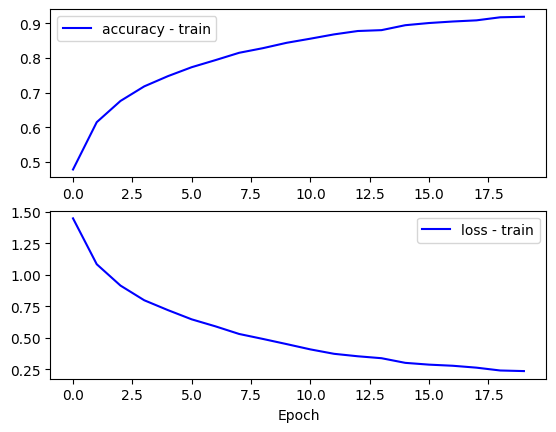

In [24]:
figure, ax = plt.subplots(2,1)

ax[0].plot(log.history['accuracy'], color='b', label="accuracy - train")
legend = ax[0].legend()
# ax[0].set_xlabel('Epoch')

ax[1].plot(log.history['loss'], color='b', label="loss - train")
legend = ax[1].legend()
ax[1].set_xlabel('Epoch')

In [25]:
train_prob = cnn.predict(x_train)
test_prob = cnn.predict(x_test)

train_pred = np.argmax(train_prob, axis=1)
test_pred = np.argmax(test_prob, axis=1)

train_report = classification_report(np.argmax(y_train, axis=1), train_pred)
test_report = classification_report(np.argmax(y_test, axis=1), test_pred)

print("Training data evaluation results : ")
print(train_report)

print("Test data evaluation results : ")
print(test_report)

313/313 [==============================] - 1s 2ms/step
Training data evaluation results : 
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      5000
           1       0.93      0.84      0.88      5000
           2       0.88      0.92      0.90      5000
           3       0.93      0.83      0.88      5000
           4       0.88      0.96      0.92      5000
           5       0.92      0.91      0.92      5000
           6       0.93      0.96      0.95      5000
           7       0.93      0.97      0.95      5000
           8       0.81      0.99      0.89      5000
           9       0.82      0.97      0.89      5000

    accuracy                           0.89     50000
   macro avg       0.90      0.89      0.89     50000
weighted avg       0.90      0.89      0.89     50000

Test data evaluation results : 
              precision    recall  f1-score   support

           0       0.89      0.53      0.67      1000
         

By comparing it to previous CNN where we had our data unbalanced, our evaluation score has increased, however the choice of data augmentation technique depends on the specific problem we are trying to solve.   
It must be also noted that we may need to try different techniques and hyperparameters to find the most effective approach for your particular case.     

class 0 :     
precision  |   recall    |    f-1     
89 vs 88   |  58 vs 40   |  67 vs 55

class 1 :     
precision  |   recall    |    f-1     
95 vs 90   |  78 vs 48   |  82 vs 64

Random zoom involves randomly scaling the image up/down by a certain factor.    
 This can help the network learn to recognize features at different scales.

Random flip involves randomly flipping the image horizontally or vertically. This can help the network learn to recognize objects that are oriented in different ways.

Random rotation involves randomly rotating the image by a certain angle. This can help the network learn to recognize objects that are rotated or tilted in different directions.      
These techniques are used to prevent overfitting and to increase the amount of training data.     

# Section 4

In [26]:
from keras.layers import Dropout, BatchNormalization

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3, 3)))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5)) 
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

cnn.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
log = cnn.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 15s 8ms/step - loss: 1.4827 - accuracy: 0.4677 - val_loss: 1.0958 - val_accuracy: 0.6094
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0330 - accuracy: 0.6399 - val_loss: 0.8850 - val_accuracy: 0.6928
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8687 - accuracy: 0.6998 - val_loss: 1.0162 - val_accuracy: 0.6446
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7667 - accuracy: 0.7349 - val_loss: 0.7671 - val_accuracy: 0.7334
Epoch 5/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6817 - accuracy: 0.7645 - val_loss: 0.7010 - val_accuracy: 0.7593
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6158 - accuracy: 0.7864 - val_loss: 0.7408 - val_accuracy: 0.7442
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5586 - accuracy: 0.8055 - val_loss: 0.6464 - val_ac

Text(0.5, 0, 'Epoch')

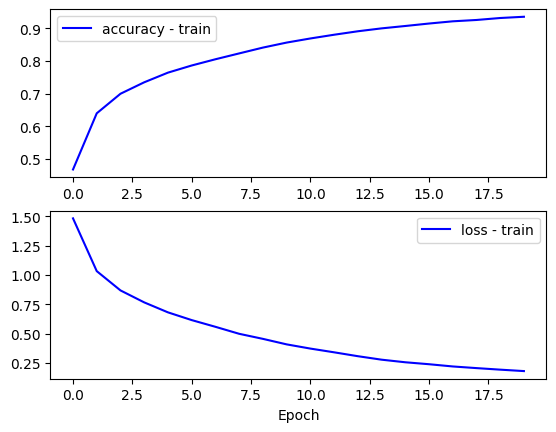

In [27]:
figure, ax = plt.subplots(2,1)

ax[0].plot(log.history['accuracy'], color='b', label="accuracy - train")
legend = ax[0].legend()
# ax[0].set_xlabel('Epoch')

ax[1].plot(log.history['loss'], color='b', label="loss - train")
legend = ax[1].legend()
ax[1].set_xlabel('Epoch')

In [28]:
train_prob = cnn.predict(x_train)
test_prob = cnn.predict(x_test)

train_pred = np.argmax(train_prob, axis=1)
test_pred = np.argmax(test_prob, axis=1)

train_report = classification_report(np.argmax(y_train, axis=1), train_pred)
test_report = classification_report(np.argmax(y_test, axis=1), test_pred)

print("Training data evaluation results : ")
print(train_report)

print("Test data evaluation results : ")
print(test_report)

313/313 [==============================] - 1s 2ms/step
Training data evaluation results : 
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      5000
           1       0.98      0.99      0.99      5000
           2       0.99      0.90      0.94      5000
           3       0.91      0.94      0.93      5000
           4       0.98      0.93      0.96      5000
           5       0.87      0.98      0.92      5000
           6       0.97      0.97      0.97      5000
           7       0.98      0.96      0.97      5000
           8       0.97      0.98      0.98      5000
           9       0.94      1.00      0.97      5000

    accuracy                           0.96     50000
   macro avg       0.96      0.96      0.96     50000
weighted avg       0.96      0.96      0.96     50000

Test data evaluation results : 
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1000
         

By comparing results to our first CNN, it can be observed that our new CNN better score :     
Precision :        
0.8 vs 0.74     
Recall :    
0.79 vs 0.74     
F-1 score :    
0.79 vs 0.74     


Batch normalization helps to stabilize the training process by normalizing the input to each neuron across a mini-batch of samples.     
This allows the model to learn more quickly and generalize better to new data. In general, batch normalization tends to improve accuracy, recall, and F1-score.     
Dropout is another regularization technique that randomly sets a fraction of the inputs to zero during each training iteration.     
Dropout can help prevent overfitting and improve the generalization of the model to new data.     
However, too much dropout can sometimes lead to underfitting and decreased performance.      
A good  use of dropout tends to improve accuracy and F1-score, but may have less impact on recall.     
However all such effects still depend on the value of hyperparameters, the dataset and our model.       